In [1]:
import pandas as pd
df = pd.read_csv("D:\ZeroTrust Ledger\data\ledger_data.csv")

<>:2: SyntaxWarning: invalid escape sequence '\Z'
<>:2: SyntaxWarning: invalid escape sequence '\Z'
C:\Users\Satyam\AppData\Local\Temp\ipykernel_16280\3155836153.py:2: SyntaxWarning: invalid escape sequence '\Z'
  df = pd.read_csv("D:\ZeroTrust Ledger\data\ledger_data.csv")


In [2]:
#Show the first 5 records
print("🔹 First 5 records:")
display(df.head())

#Check for missing values
print("\n🔸 Null value check:")
print(df.isnull().sum())

#Check data types
print("\n🔸 Data types:")
print(df.dtypes)

🔹 First 5 records:


,Entry_ID,Date,Amount,Vendor,Description,Department,Status
0,1001,2024-01-05,45000,Alpha Systems,Software license renewal,IT,Approved
1,1002,2024-01-06,120000,XZY Solutions,Consulting fee,Mgmt,Approved
2,1003,2024-01-07,80000,ABC123 Ltd,Miscellaneous services,Finance,Approved
3,1004,2024-01-08,50000,QuickSupplies,Stationery purchase,Admin,Approved
4,1005,2024-01-09,220000,Global Tech,Server maintenance,IT,Approved



🔸 Null value check:
Entry_ID       0
Date           0
Amount         0
Vendor         0
Description    0
Department     0
Status         0
dtype: int64

🔸 Data types:
Entry_ID        int64
Date           object
Amount          int64
Vendor         object
Description    object
Department     object
Status         object
dtype: object


In [3]:
#  Basic statistics of the Amount column
print(" Ledger Amount Statistics:")
display(df['Amount'].describe())

# 🧾 Count of transactions per Vendor
print("\n Number of transactions per Vendor:")
display(df['Vendor'].value_counts())

# 🏢 Count of transactions per Department
print("\n Number of transactions per Department:")
display(df['Department'].value_counts())


 Ledger Amount Statistics:


count        20.000000
mean      93950.000000
std       65666.201352
min        4000.000000
25%       48750.000000
50%       89500.000000
75%      122500.000000
max      250000.000000
Name: Amount, dtype: float64


 Number of transactions per Vendor:


Vendor
Alpha Systems         4
NextGen Inc.          3
XZY Solutions         2
QuickSupplies         2
ABC123 Ltd            1
Global Tech           1
UnkownVendorX         1
ABCD Pvt Ltd          1
LLM Services          1
BrightTech Pvt Ltd    1
FakeVendorX           1
OfficeKart            1
UnknownLLC            1
Name: count, dtype: int64


 Number of transactions per Department:


Department
IT         6
Mgmt       4
Admin      4
Finance    3
HR         3
Name: count, dtype: int64

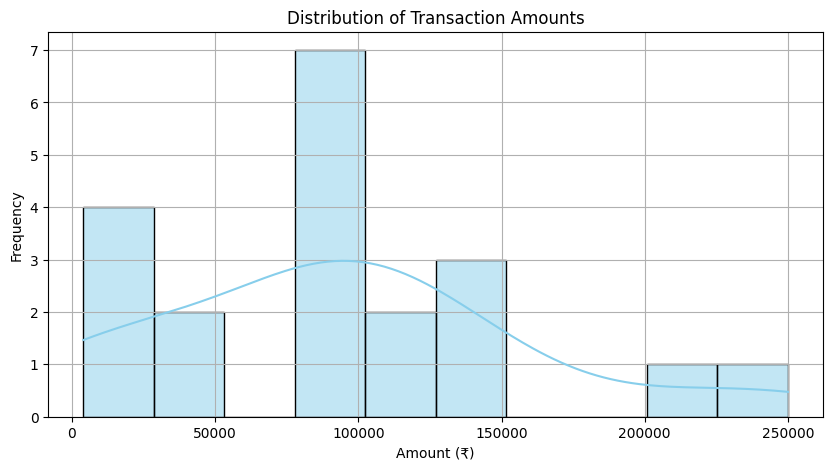

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of transaction amounts
plt.figure(figsize=(10, 5))
sns.histplot(df['Amount'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount (₹)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


C:\Users\Satyam\AppData\Local\Temp\ipykernel_16280\4100288415.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendor_counts.index, y=vendor_counts.values, palette="viridis")


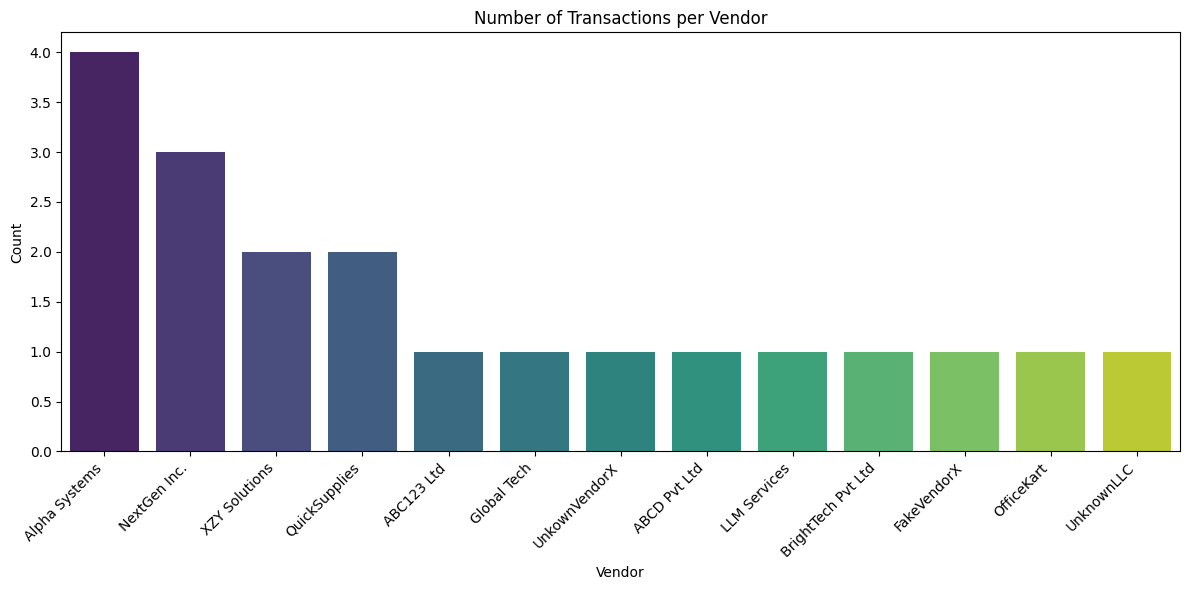

In [5]:
# 📊 Vendor frequency chart
plt.figure(figsize=(12, 6))
vendor_counts = df['Vendor'].value_counts()
sns.barplot(x=vendor_counts.index, y=vendor_counts.values, palette="viridis")
plt.title("Number of Transactions per Vendor")
plt.xlabel("Vendor")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [6]:
#  Rule 1: Transactions > ₹100000
high_amounts = df[df['Amount'] > 100000]
print("@ Transactions > ₹100000:")
display(high_amounts)

#  Rule 2: Vendors with only 1 transaction
rare_vendors = df['Vendor'].value_counts()[df['Vendor'].value_counts() == 1].index
rare_vendor_txns = df[df['Vendor'].isin(rare_vendors)]
print("@ Transactions with Rare Vendors (only 1 record):")
display(rare_vendor_txns)

#  Rule 3: Duplicated records (Amount + Vendor + Description)
duplicates = df[df.duplicated(subset=['Amount', 'Vendor', 'Description'], keep=False)]
print("@ Potential Duplicate Transactions (copy-paste fraud):")
display(duplicates)


@ Transactions > ₹100000:


,Entry_ID,Date,Amount,Vendor,Description,Department,Status
1,1002,2024-01-06,120000,XZY Solutions,Consulting fee,Mgmt,Approved
4,1005,2024-01-09,220000,Global Tech,Server maintenance,IT,Approved
9,1010,2024-01-15,115000,ABCD Pvt Ltd,Misc,HR,Approved
13,1014,2024-01-21,130000,Alpha Systems,Data security audit,IT,Approved
14,1015,2024-01-21,250000,BrightTech Pvt Ltd,Hardware replacement,Admin,Approved
16,1017,2024-01-22,150000,FakeVendorX,Emergency outsourcing,Finance,Approved
18,1019,2024-01-24,140000,UnknownLLC,Misc,HR,Approved


@ Transactions with Rare Vendors (only 1 record):


,Entry_ID,Date,Amount,Vendor,Description,Department,Status
2,1003,2024-01-07,80000,ABC123 Ltd,Miscellaneous services,Finance,Approved
4,1005,2024-01-09,220000,Global Tech,Server maintenance,IT,Approved
6,1007,2024-01-13,92000,UnkownVendorX,Service charges,Finance,Approved
9,1010,2024-01-15,115000,ABCD Pvt Ltd,Misc,HR,Approved
12,1013,2024-01-20,85000,LLM Services,Miscellaneous,HR,Approved
14,1015,2024-01-21,250000,BrightTech Pvt Ltd,Hardware replacement,Admin,Approved
16,1017,2024-01-22,150000,FakeVendorX,Emergency outsourcing,Finance,Approved
17,1018,2024-01-23,4000,OfficeKart,Pantry expenses,Admin,Approved
18,1019,2024-01-24,140000,UnknownLLC,Misc,HR,Approved


@ Potential Duplicate Transactions (copy-paste fraud):


,Entry_ID,Date,Amount,Vendor,Description,Department,Status
7,1008,2024-01-14,87000,NextGen Inc.,Urgent project support,Mgmt,Approved
8,1009,2024-01-14,87000,NextGen Inc.,Urgent project support,Mgmt,Approved


In [7]:
#Data preprocessing 
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid altering original dataframe
df_ml = df.copy()

# Columns to encode
categorical_cols = ['Vendor', 'Description', 'Department', 'Status']

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    df_ml[col] = le.fit_transform(df_ml[col])

# Preview the result
print("@ After Label Encoding:")
display(df_ml.head())


# Drop Entry_ID and Date
df_ml = df_ml.drop(columns=['Entry_ID', 'Date'])

#  Confirm remaining columns
print("@ Remaining columns:")
print(df_ml.columns)


# Copy the original dataframe to ensure index consistency
df_final = df_ml.copy()

# Identify rare vendors
vendor_counts = df['Vendor'].value_counts()
rare_vendors = vendor_counts[vendor_counts == 1].index

#  Logic to flag suspicious transactions
df_final['Is_Suspicious'] = 0  # Default = Not suspicious

# Rule 1: Amount > 100000
df_final.loc[df['Amount'] > 100000, 'Is_Suspicious'] = 1

# Rule 2: Rare vendors
df_final.loc[df['Vendor'].isin(rare_vendors), 'Is_Suspicious'] = 1

# Rule 3: Duplicates
duplicate_flags = df.duplicated(subset=['Amount', 'Vendor', 'Description'], keep=False)
df_final.loc[duplicate_flags, 'Is_Suspicious'] = 1

#  Preview
print("@ Final dataset with Is_Suspicious label:")
display(df_final.head())


@ After Label Encoding:


,Entry_ID,Date,Amount,Vendor,Description,Department,Status
0,1001,2024-01-05,45000,2,14,3,0
1,1002,2024-01-06,120000,12,1,4,0
2,1003,2024-01-07,80000,0,8,1,0
3,1004,2024-01-08,50000,9,15,0,0
4,1005,2024-01-09,220000,5,12,3,0


@ Remaining columns:
Index(['Amount', 'Vendor', 'Description', 'Department', 'Status'], dtype='object')
@ Final dataset with Is_Suspicious label:


,Amount,Vendor,Description,Department,Status,Is_Suspicious
0,45000,2,14,3,0,0
1,120000,12,1,4,0,1
2,80000,0,8,1,0,1
3,50000,9,15,0,0,0
4,220000,5,12,3,0,1


In [8]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = df_final.drop(columns=['Is_Suspicious'])
y = df_final['Is_Suspicious']

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#  Confirm split shapes
print(f"@ Training set size: {X_train.shape}")
print(f"@ Test set size: {X_test.shape}")


@ Training set size: (16, 5)
@ Test set size: (4, 5)


In [9]:
from sklearn.ensemble import RandomForestClassifier

#  Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# 🧪 Predict on the test set
y_pred = model.predict(X_test)

# 📈 Evaluation metrics
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Precision:", precision_score(y_test, y_pred))
print("✅ Recall:", recall_score(y_test, y_pred))

# 🔍 Confusion matrix
print("\n🧾 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 📋 Detailed classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))


✅ Accuracy: 0.75
✅ Precision: 0.75
✅ Recall: 1.0

🧾 Confusion Matrix:
[[0 1]
 [0 3]]

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



C:\Users\Satyam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Satyam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Satyam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [13]:
import os
import pickle

# 👨‍🏫 Assuming your trained model is called `model`
# 📁 Create the models folder if it doesn't exist
os.makedirs('models', exist_ok=True)

# 💾 Save the model
with open('models/fraud_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("✅ Model saved successfully.")


✅ Model saved successfully.


In [11]:
import os

print("File exists?" , os.path.exists("models/fraud_model.pkl"))


File exists? True


In [12]:
import os
if os.path.exists("models/fraud_model.pkl"):
    os.remove("models/fraud_model.pkl")


In [13]:
import pickle
os.makedirs("models", exist_ok=True)

with open("models/fraud_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model saved again.")


✅ Model saved again.
